In [13]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
import os

obesity_data = pd.read_csv("data_sources/National_Obesity_By_State.csv")
gym_data = pd.read_csv("data_sources/US_states_gyms_2019.csv")
pactive_data = pd.read_csv("data_sources/physical_activeness_states_2019.csv") 

#merge gym data and physical activeness data, dropping duplicated columns then rename
activeness_df = pd.merge(gym_data, pactive_data, on='alpha code', how='right')
activeness_df = activeness_df.drop(columns=['state_y', 'state code_y'])
activeness_df.rename(columns ={'state_x': 'State','state code_x': 'State Code'}, inplace = True)
activeness_df['State'] = activeness_df['State'].str.title() #capitalise State names so can be merged with obesity_data

#checking with obesity_data before renaming and dropping unwanted rows and columns 
obesity_data.rename(columns={'NAME':'State'}, inplace = True) # rename column NAME to State to match up with activeness_df 
obesity_data =obesity_data.drop(columns=['FID', 'SHAPE_Length', 'SHAPE_Area']) #dropping unwanted columns
obesity_data= obesity_data.drop([35,38]) #dropping index number for District of Columbia and Puerto Rico

#merge activeness_df with obesity_data
obesevactive_df = pd.merge(activeness_df, obesity_data, how='outer')
obesevactive_df.reset_index(drop=True, inplace=True)

#output csv file
obesevactive_df.to_csv('data_sources\obese_vs_activeness.csv',index = False, header=True)
obesevactive_df


,State,State Code,alpha code,total gyms,per 100K residents (%),prevalance of inactivity,meets cdc requirement (%),adolescents physically active (%),Obesity
0,Alabama,1,AL,385,7.9,31.0,17.6,23.2,35.6
1,Alaska,2,AK,90,12.2,20.3,25.6,17.9,29.8
2,Arizona,4,AZ,318,4.5,23.7,25.5,22.0,28.4
3,Arkansas,5,AR,134,4.4,32.5,19.3,22.7,34.5
4,California,6,CA,3365,8.5,20.4,22.6,20.5,24.2
5,Colorado,8,CO,551,9.7,17.3,27.4,25.4,20.2
6,Connecticut,9,CT,575,16.0,22.7,26.1,23.2,25.3
7,Delaware,10,DE,142,14.6,28.4,23.8,NaN,29.7
8,Florida,12,FL,2463,11.6,28.0,27.0,22.7,26.8
9,Georgia,13,GA,115,9.6,28.5,24.1,24.0,30.7


The correlation between both factors is -0.35


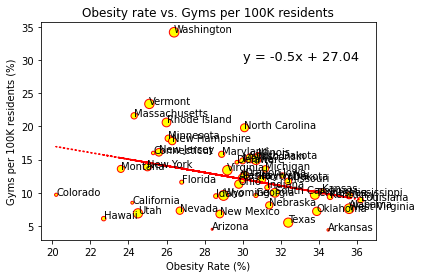

In [40]:
size = [2*n for n in range(len(obesevactive_df['Obesity']))]
plt.scatter(obesevactive_df['Obesity'], obesevactive_df['per 100K residents (%)'], color='yellow', s = size, edgecolors="red")
plt.title(f'Obesity rate vs. Gyms per 100K residents')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Gyms per 100K residents (%)')

#created correlation function so can be reused
#input x for x-axis, y for y-axis
#for annotation, i for x-axis position,j for y-axis position
def correlation(x, y, i, j):
    correlation = sts.pearsonr(x, y)
    slope, c_int, r, p, std_err = sts.linregress(x, y)
    fit = slope * x + c_int
    line_equation = f'y = {str(round(slope,2))}x + {str(round(c_int,2))}'
    plt.annotate(line_equation,(i,j),fontsize=13,color='black')
    plt.plot(x,fit,':r')
    print(f'The correlation between both factors is {round(correlation[0],2)}')

#call correlation function to get the linear correlation for Obesity and Per 100K residents
correlation(obesevactive_df['Obesity'], obesevactive_df['per 100K residents (%)'], 30, 30)

#to print out names on plots
for n, txt in enumerate(obesevactive_df['State']):
    plt.annotate(txt, (obesevactive_df['Obesity'][n], obesevactive_df['per 100K residents (%)'][n]))
#the above can be commented out if scatterplot looks junky. enable just to have a look.

plt.savefig("output/obese_vs_gyms.png")

The relationship between the Obesity Rate of a state and available Gyms per 100K state residents is a low negative (weak) correlation with the R-value of -0.35. This means despite having more gyms per 100K state residents, it has not much affect on the obesity rates in a state. An interesting observation that can support this is the data plot which has the highest % of gyms per 100K residents (Washington) still have a higher rate of Obesity compared to those with less gyms available (Colorado, Hawaii)

The correlation between both factors is -0.74
The correlation between both factors is 0.7


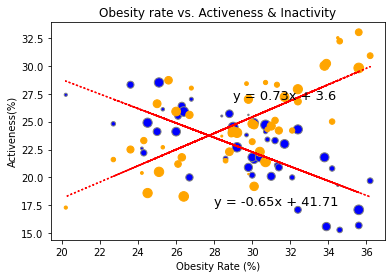

<Figure size 432x288 with 0 Axes>

In [41]:
#let's try to see if the CDC is right on physical activeness by identifying the relationship between activeness and obesity 

size = [2*n for n in range(len(obesevactive_df['Obesity']))]
ax = plt.gca()
ax.scatter(obesevactive_df['Obesity'], obesevactive_df['meets cdc requirement (%)'], color='blue', s = size, edgecolors="gray")
ax.scatter(obesevactive_df['Obesity'], obesevactive_df['prevalance of inactivity'], color='orange', s = size)
plt.title(f'Obesity rate vs. Activeness & Inactivity')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Activeness(%)')

#dropping State: New Jersey as no data is available for Activeness
no_newjersey= obesevactive_df.drop([29])

#call correlation function to get the linear correlation for Obesity and Activeness
correlation(no_newjersey['Obesity'], no_newjersey['meets cdc requirement (%)'], 28, 17.5)
correlation(obesevactive_df['Obesity'], obesevactive_df['prevalance of inactivity'], 29, 27)
plt.show()
plt.savefig("output/obese_vs_active.png")

As one of the causes of Obesity defined by the CDC is due to physical inactivity, there is a strong (but not perfect) negative relationship between Obesity rate and physical activeness (R2= -0.74) while a positive strong relationship between Obesity rate and physical inactivity (R2 = 0.7). This proves that the state residents that meets the CDC's physical activeness requirements have a lower obesity rate. However as this has become almost common knowledge, there is nothing to explore here.